Final Project ID/X Partners Data Scientist
Created by: Yunita Salsabila 

### Table Of Contents

1. Business Problem Understanding 
2. Initial Setup 
3. Data Understanding 
4. Data Preparation
5. Modeling
6. Conclusion & Recommendation 

### 1. BUSINESS PROBLEM UNDERSTANDING

**Tujuan**

*Mengurangi risiko kredit macet*: Hal ini penting untuk menjaga stabilitas keuangan perusahaan dan menghindari kerugian finansial. Contohnya, jika perusahaan memberikan pinjaman kepada pelanggan berisiko tinggi, ada kemungkinan besar mereka tidak akan dapat membayar pinjaman tersebut. Hal ini dapat menyebabkan perusahaan kehilangan uang dan mengalami kesulitan keuangan.

*Meningkatkan pengambilan keputusan kredit*: Dengan memprediksi risiko kredit secara akurat, perusahaan dapat membuat keputusan yang lebih baik tentang siapa yang akan diberi pinjaman dan berapa banyak yang akan dipinjamkan. Hal ini dapat membantu perusahaan menghindari memberikan pinjaman kepada pelanggan yang berisiko tinggi dan meningkatkan peluang untuk mendapatkan keuntungan dari pinjaman.

*Meminimalkan kerugian perusahaan*: Kerugian dapat terjadi ketika perusahaan memberikan pinjaman kepada pelanggan yang tidak dapat membayarnya. Dengan memprediksi risiko kredit secara akurat, perusahaan dapat meminimalkan risiko kerugian dan meningkatkan profitabilitas.

**Masalah**

*Memprediksi risiko kredit dari pelanggan yang mengajukan pinjaman*: Hal ini dapat menjadi tugas yang sulit karena ada banyak faktor yang dapat memengaruhi kemampuan pelanggan untuk membayar pinjaman. Faktor-faktor ini termasuk riwayat kredit pelanggan, pendapatan, pekerjaan, dan situasi keuangan.

**Pendekatan**

*Berkomunikasi dengan tim manajemen perusahaan, tim risiko, dan tim keuangan untuk memahami kebutuhan dan perspektif mereka*: Hal ini penting untuk memastikan bahwa model prediksi risiko kredit memenuhi kebutuhan semua pemangku kepentingan.
*Mengembangkan model prediksi risiko kredit*: Model ini dapat menggunakan berbagai teknik statistik dan data untuk memprediksi probabilitas pelanggan gagal membayar pinjaman.

**Kriteria Keberhasilan**

*Meningkatkan akurasi prediksi risiko kredit*: Hal ini dapat dicapai dengan menggunakan model prediksi yang akurat dan data yang up-to-date.
*Mengurangi risiko kredit macet*: Hal ini dapat dicapai dengan menggunakan model prediksi risiko kredit untuk membuat keputusan kredit yang lebih baik.

**Goal Pengolahan**

Membuat suatu model yang dapat menentukan apakah seseorang dapat mampu atau tidak mampu untuk membayar ktedit yang diajukan 

**Analytic Approach**

1. Analisis data akan dilakukan untuk menemukan pola pada fitur-fitur yang terdapat dalam dataset, yang membedakan karakteristik setiap pengguna.
2. Mengingat permasalahan yang ada, kami akan membangun model machine learning karena kami perlu membuat prediksi yang lebih akurat dibandingkan hanya menggunakan pendekatan analisis inferensial dan/atau deskriptif.

**Modelling**

**Data**

Dataset dari Kaggle yang berisi catatan Data Lending Club dari tahun 2007-2014.

### 2. INITIAL SETUP

In [32]:
# Library
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

### 3. DATA UNDERSTANDING

In [88]:
df = pd.read_csv('Data.csv')
df.head()

/var/folders/m9/tjsvgwfx2kqg61yg7fh576hw0000gp/T/ipykernel_10383/2887658449.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [35]:
# Data insight
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [36]:
# Missing value
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().sample(5,replace=True).values)]);

df_desc = pd.DataFrame(columns=['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample'],
                     data=listItem)
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
0,Unnamed: 0,int64,0,0.00,466285,"[302138, 115647, 14713, 143026, 261119]"
1,id,int64,0,0.00,466285,"[22341712, 10082347, 8876474, 32478948, 30815740]"
2,member_id,int64,0,0.00,466285,"[26487698, 6067600, 1461646, 1804134, 16732251]"
3,loan_amnt,int64,0,0.00,1352,"[15475, 16375, 15325, 31100, 16025]"
4,funded_amnt,int64,0,0.00,1354,"[30400, 15225, 19575, 22775, 27925]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
71,total_rev_hi_lim,float64,70276,15.07,14612,"[47698.0, 65024.0, 44496.0, 53798.0, 244800.0]"
72,inq_fi,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
73,total_cu_tl,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"


In [37]:
#Checking data characteristics
pd.DataFrame({
    'feature':df.columns.values,
    'data_type':df.dtypes.values,
    'null_value':[df[col].isna().sum()for col in df.columns],
    '%null_value':df.isna().mean().values*100,
    'n_unique':df.nunique().values,
    'sample_unique':[df[col].unique() for col in df.columns]
})

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
...,...,...,...,...,...,...
70,all_util,float64,466285,100.000000,0,[nan]
71,total_rev_hi_lim,float64,70276,15.071469,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400..."
72,inq_fi,float64,466285,100.000000,0,[nan]
73,total_cu_tl,float64,466285,100.000000,0,[nan]


### 4. DATA PREPARATION

***DATA CLEANING***

In [38]:
#count the number of rows and columns
jumlah_baris = len(df)
jumlah_kolom = len(df.columns)

print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 466285
Jumlah Kolom: 75


In [39]:
#count missing value 
missing_values = df.isnull().sum()

print(missing_values)

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64


In [40]:
#Copy Dataframe (creates an independent copy of the original DataFrame.This means changes made to the copy will not affect the original DataFrame, and vice versa.)
df_copy = df.copy()


In [41]:
df_copy.shape

(466285, 75)

In [42]:
#Determining Missing Value Thresholds
#columns must have at least 70% of the total number of rows not missing.
threshold = len(df_copy) * 0.7

In [43]:
#Deleting Columns with More Than 70% Missing Values
df_clean = df_copy.dropna(axis=1, thresh=threshold)

In [44]:
df_clean.shape

(466285, 53)

In [45]:
# Check value for loan_status
df_clean.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [46]:
# Determine categories for excellent loans and bad loans
excellent_loan_statuses = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_statuses = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Create a new column 'loan_category' to classify loans as 'Excellent' or 'Bad'
df['loan_category'] = df['loan_status'].apply(lambda x: 'Excellent' if x in excellent_loan_statuses else 'Bad')
df_clean = pd.concat([df_clean, df['loan_category']], axis=1)

# Count the occurrences of each loan category
loan_category_counts = df['loan_category'].value_counts()


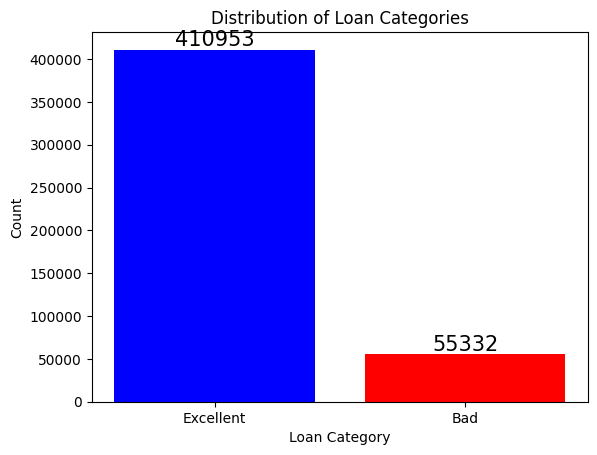

In [47]:
# Create loan category colors
colors = ['blue', 'red']

# Plot distribution of loan categories
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Distribution of Loan Categories')

# Add labels
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=15)


In [48]:
# Check remaining columns
df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_category'],
      dtype='object')

In [49]:
for column in df_clean.columns:
    value_counts = df_clean[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")


Value counts for Unnamed: 0:
Unnamed: 0
466284    1
0         1
1         1
2         1
3         1
         ..
17        1
16        1
15        1
14        1
13        1
Name: count, Length: 466285, dtype: int64

Value counts for id:
id
9199665    1
1077501    1
1077430    1
1077175    1
1076863    1
          ..
1069971    1
1065775    1
1069759    1
1069057    1
1069866    1
Name: count, Length: 466285, dtype: int64

Value counts for member_id:
member_id
11061576    1
1296599     1
1314167     1
1313524     1
1277178     1
           ..
1304884     1
1299699     1
1304871     1
1303503     1
1304956     1
Name: count, Length: 466285, dtype: int64

Value counts for loan_amnt:
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
34675        1
33400        1
34525        1
33175        1
Name: count, Length: 1352, dtype: int64

Value counts for funded_amnt:
funded_amnt
10000    32930
12000    25426
15000    23370
20000    

In [50]:

# Drop Unecessary Column
unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'id', 'member_id','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'zip_code', 'title', 'emp_title','loan_status']

drop_data = df_clean[unused_col]

df_clean.drop(columns=unused_col, axis=1, inplace=True)

In [51]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN,Excellent
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent


In [52]:
#Missing Values Imputation
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq              

In [53]:
# List of columns for imputation
categorical_columns = ['emp_length', 'verification_status', 'earliest_cr_line', 'last_credit_pull_d']
numerical_columns = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
                    'collections_12_mths_ex_med', 'acc_now_delinq']

# Impute categorical columns with mode
for col in categorical_columns:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)

# Impute numerical columns with median
for col in numerical_columns:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

/var/folders/m9/tjsvgwfx2kqg61yg7fh576hw0000gp/T/ipykernel_10383/2330630658.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_value, inplace=True)
/var/folders/m9/tjsvgwfx2kqg61yg7fh576hw0000gp/T/ipykernel_10383/2330630658.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [54]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_credit_pull_d                0
collections_12_mths_ex_med        0
acc_now_delinq              

In [55]:
df_clean.duplicated().any()

np.False_

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
url                            object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
last_credit_pull_d             object
collections_

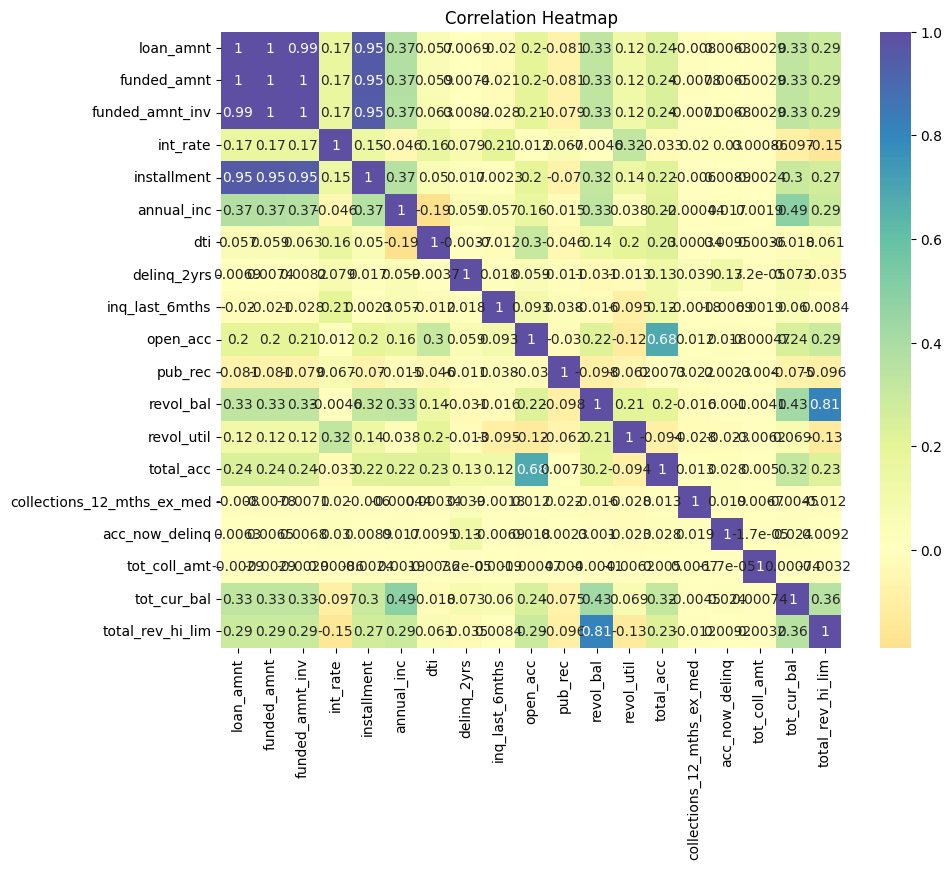

In [56]:

#Displays the data type of each column
print(df_clean.dtypes)

#Delete columns that are not numeric
df_clean_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

#Calculating the correlation matrix
correlation_matrix = df_clean_numeric.corr()

#Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [57]:
# Similarity  Check
print(df_clean[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe())

           loan_amnt    funded_amnt  funded_amnt_inv
count  466285.000000  466285.000000    466285.000000
mean    14317.277577   14291.801044     14222.329888
std      8286.509164    8274.371300      8297.637788
min       500.000000     500.000000         0.000000
25%      8000.000000    8000.000000      8000.000000
50%     12000.000000   12000.000000     12000.000000
75%     20000.000000   20000.000000     19950.000000
max     35000.000000   35000.000000     35000.000000


In [58]:
unused_col2 = ['funded_amnt', 'funded_amnt_inv','url','pub_rec','installment', 'dti', 'revol_bal', 'total_acc','earliest_cr_line', 'last_credit_pull_d','initial_list_status','tot_coll_amt', 'sub_grade'
,'tot_cur_bal','total_rev_hi_lim','purpose', 'addr_state', ]
df_clean2 = df_clean.drop(columns = unused_col2)

In [59]:
df_clean2.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,acc_now_delinq,loan_category
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,0.0,1.0,3.0,83.7,0.0,0.0,Excellent
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,0.0,5.0,3.0,9.4,0.0,0.0,Bad
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,0.0,2.0,2.0,98.5,0.0,0.0,Excellent
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,0.0,1.0,10.0,21.0,0.0,0.0,Excellent
4,3000,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,0.0,0.0,15.0,53.9,0.0,0.0,Excellent


loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
revol_util                    float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
loan_category                  object
dtype: object


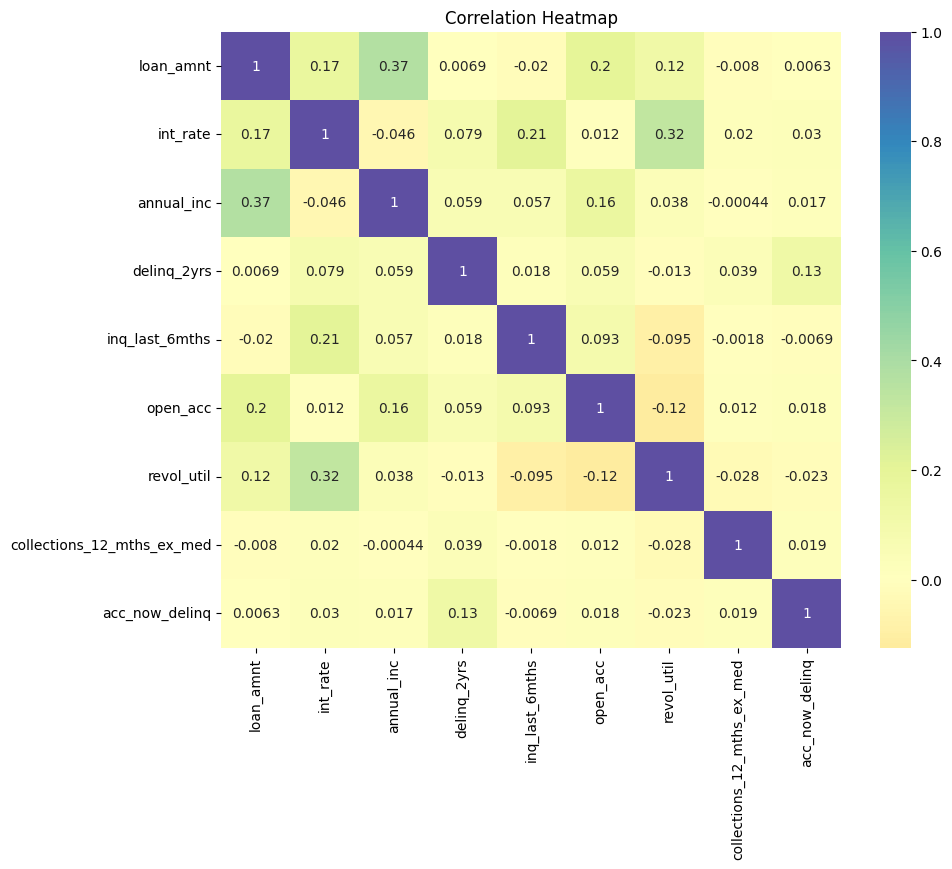

In [60]:
# Identify the data type of each column
print(df_clean2.dtypes)

# Delete non-numeric columns
df_clean2_numeric = df_clean2.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = df_clean2_numeric.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   delinq_2yrs                 466285 non-null  float64
 9   inq_last_6mths              466285 non-null  float64
 10  open_acc                    466285 non-null  float64
 11  revol_util                  466285 non-null  float64
 12  collections_12_mths_ex_med  466285 non-null  float64
 13  acc_now_delinq

In [62]:
df_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.00,63000.00,88953.00,7500000.00
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.00,0.00,1.00,33.00
open_acc,466285.0,11.186995,4.987380,0.00,8.00,10.00,14.00,84.00
revol_util,466285.0,56.177985,23.724005,0.00,39.20,57.60,74.70,892.30
collections_12_mths_ex_med,466285.0,0.009082,0.108632,0.00,0.00,0.00,0.00,20.00
acc_now_delinq,466285.0,0.004002,0.068635,0.00,0.00,0.00,0.00,5.00


In [63]:
df_clean2['term'] = df_clean2['term'].apply(lambda x: int(x.split()[0]))
df_clean2['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [64]:
df_clean2['emp_length'] = df_clean2['emp_length'].str.extract('(\d+)').astype(int)
df_clean2['emp_length']

0         10
1          1
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length, Length: 466285, dtype: int64

### 5. Modeling

In [65]:
encoded_verification = pd.get_dummies(df_clean2['verification_status'], prefix='verification', drop_first=True)
encoded_home_ownership = pd.get_dummies(df_clean2['home_ownership'], prefix='home', drop_first=True)
encoded_grade = pd.get_dummies(df_clean2['grade'], prefix='grade', drop_first=True)

# Combine encoded features
encoded_categorical = pd.concat([encoded_verification, encoded_home_ownership, encoded_grade], axis=1)
df_clean2 = pd.concat([df_clean2, encoded_categorical], axis=1)

# Delete the original encoded columns
df_clean2.drop(['verification_status', 'home_ownership', 'grade'], axis=1, inplace=True)


In [66]:
df_clean2.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,...,home_NONE,home_OTHER,home_OWN,home_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000,36,10.65,10,24000.0,0.0,1.0,3.0,83.7,0.0,...,False,False,False,True,True,False,False,False,False,False
1,2500,60,15.27,1,30000.0,0.0,5.0,3.0,9.4,0.0,...,False,False,False,True,False,True,False,False,False,False
2,2400,36,15.96,10,12252.0,0.0,2.0,2.0,98.5,0.0,...,False,False,False,True,False,True,False,False,False,False
3,10000,36,13.49,10,49200.0,0.0,1.0,10.0,21.0,0.0,...,False,False,False,True,False,True,False,False,False,False
4,3000,60,12.69,1,80000.0,0.0,0.0,15.0,53.9,0.0,...,False,False,False,True,True,False,False,False,False,False


In [67]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     466285 non-null  int64  
 1   term                          466285 non-null  int64  
 2   int_rate                      466285 non-null  float64
 3   emp_length                    466285 non-null  int64  
 4   annual_inc                    466285 non-null  float64
 5   delinq_2yrs                   466285 non-null  float64
 6   inq_last_6mths                466285 non-null  float64
 7   open_acc                      466285 non-null  float64
 8   revol_util                    466285 non-null  float64
 9   collections_12_mths_ex_med    466285 non-null  float64
 10  acc_now_delinq                466285 non-null  float64
 11  loan_category                 466285 non-null  object 
 12  verification_Source Verified  466285 non-nul

In [68]:
df_clean2['loan_category'].value_counts()

loan_category
Excellent    410953
Bad           55332
Name: count, dtype: int64

In [69]:
# Define features (X) and target variable (Y)
X = df_clean2.drop('loan_category', axis=1)  # Features
Y = df_clean2['loan_category']  # Target variable

# Get the column names as feature names
feature_names = X.columns.tolist()

In [70]:
# Split the data into training and testing sets (80% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}
model_names = []
accuracies = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.33      0.00      0.01     11080
         Bad       0.88      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.60      0.50      0.47     93257
weighted avg       0.82      0.88      0.83     93257

Random Forest Accuracy: 0.8807
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00     11080
         Bad       0.88      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.44      0.50      0.47     93257
weighted avg       0.78      0.88      0.83     93257

Logistic Regression Accuracy: 0.8812
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recal

In [73]:
model_names

['Random Forest',
 'Logistic Regression',
 'Decision Tree',
 'Gradient Boosting',
 'K-Nearest Neighbors']

In [74]:
accuracies

[0.8807381751503909,
 0.8811563743204264,
 0.7847453810437822,
 0.8811885434873522,
 0.8665194033691841]

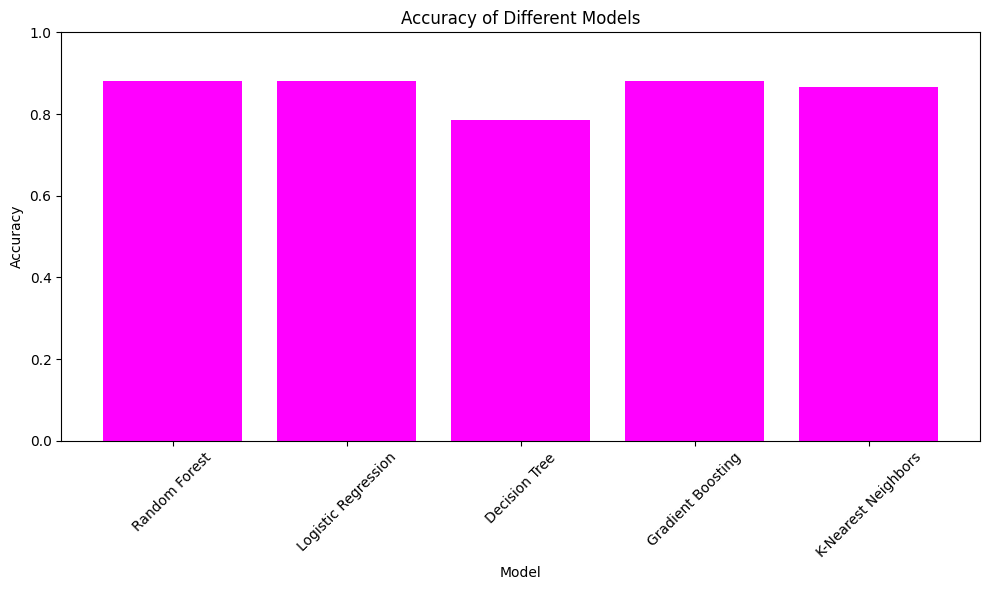

In [75]:
# Create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='magenta')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [76]:
df_clean2['loan_category'].value_counts()

loan_category
Excellent    410953
Bad           55332
Name: count, dtype: int64

In [77]:
X_o = df_clean2.drop(['loan_category'], axis=1)
y_o = df_clean2['loan_category']

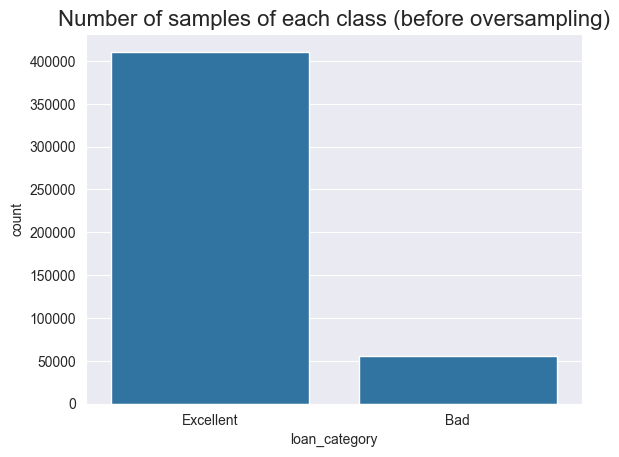

In [89]:
sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_o),x='loan_category')
plt.title('Number of samples of each class (before oversampling)', fontsize=16)
plt.show()

In [79]:
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X_o, y_o)

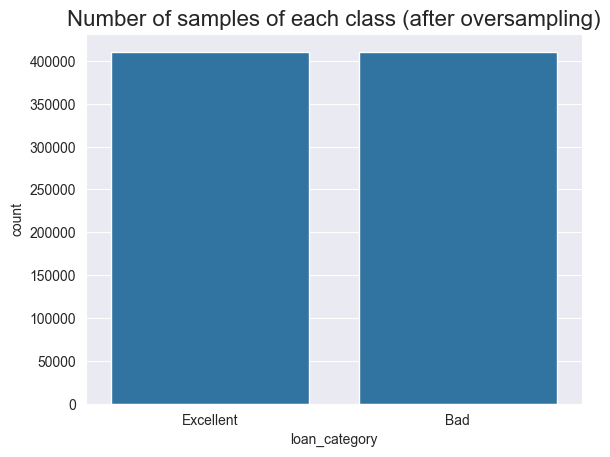

In [80]:
sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_over),x='loan_category')
plt.title('Number of samples of each class (after oversampling)', fontsize=16)
plt.show()

In [81]:
# Split the data into training and testing sets (80% training, 30% testing)
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [82]:
# Normalize features
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.fit_transform(X_test_over)

In [83]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}
model_names_over = []
accuracies_over = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_over, Y_train_over)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test_over)

    confusion = confusion_matrix(Y_test_over, Y_pred)
    classification_rep = classification_report(
        Y_test_over, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test_over, Y_pred)

    model_names_over.append(model_name)
    accuracies_over.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.98      0.98     81995
         Bad       0.98      0.98      0.98     82387

    accuracy                           0.98    164382
   macro avg       0.98      0.98      0.98    164382
weighted avg       0.98      0.98      0.98    164382

Random Forest Accuracy: 0.9826
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.62      0.65      0.63     81995
         Bad       0.63      0.60      0.62     82387

    accuracy                           0.62    164382
   macro avg       0.62      0.62      0.62    164382
weighted avg       0.62      0.62      0.62    164382

Logistic Regression Accuracy: 0.6235
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recal

In [84]:
model_names_over

['Random Forest',
 'Logistic Regression',
 'Decision Tree',
 'Gradient Boosting',
 'K-Nearest Neighbors']

In [85]:
accuracies_over

[0.9825893345986787,
 0.6235293401953985,
 0.7761616235354236,
 0.6301298195666192,
 0.8167135087783334]

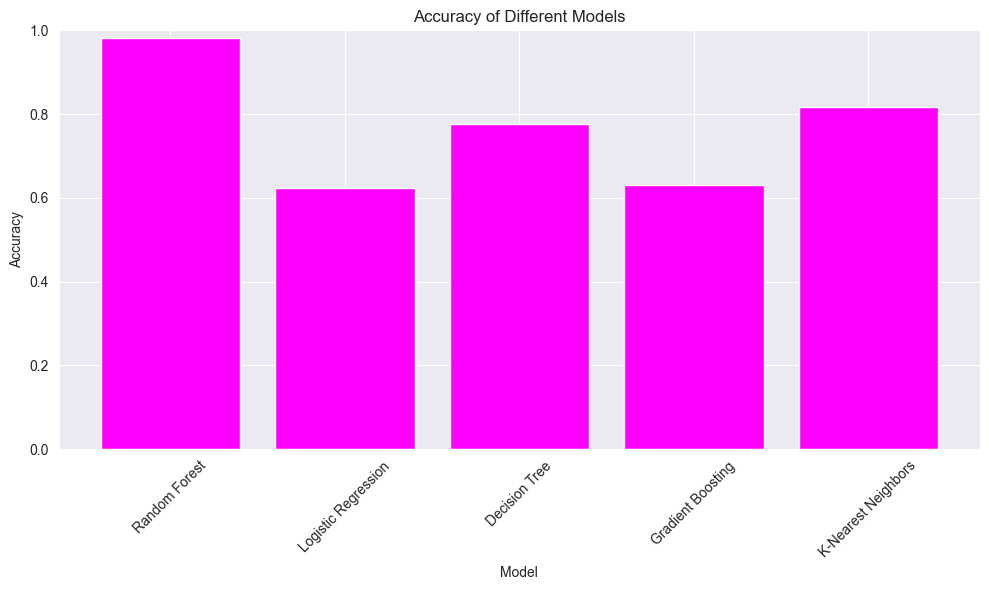

In [86]:
# Create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names_over, accuracies_over, color='magenta')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### 6. Conclusion & Recommendation 